## 练习2-2
创建一个锯齿波对象，计算它的频谱；其谐波结构跟三角波和方波谐波结构相比有什么特点？

In [28]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 三角波信号
duration = 1       # 信号持续时间（秒）
sample_rate = 2000 # 采样率（Hz）
base_freq = 10      # 频率
amplitude = 0.5      # 振幅

# 生成时间序列
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
# 生成信号
tri_signal = amplitude * signal.sawtooth(2*np.pi*base_freq*t, width=0.5) # width = 0.5时为三角波


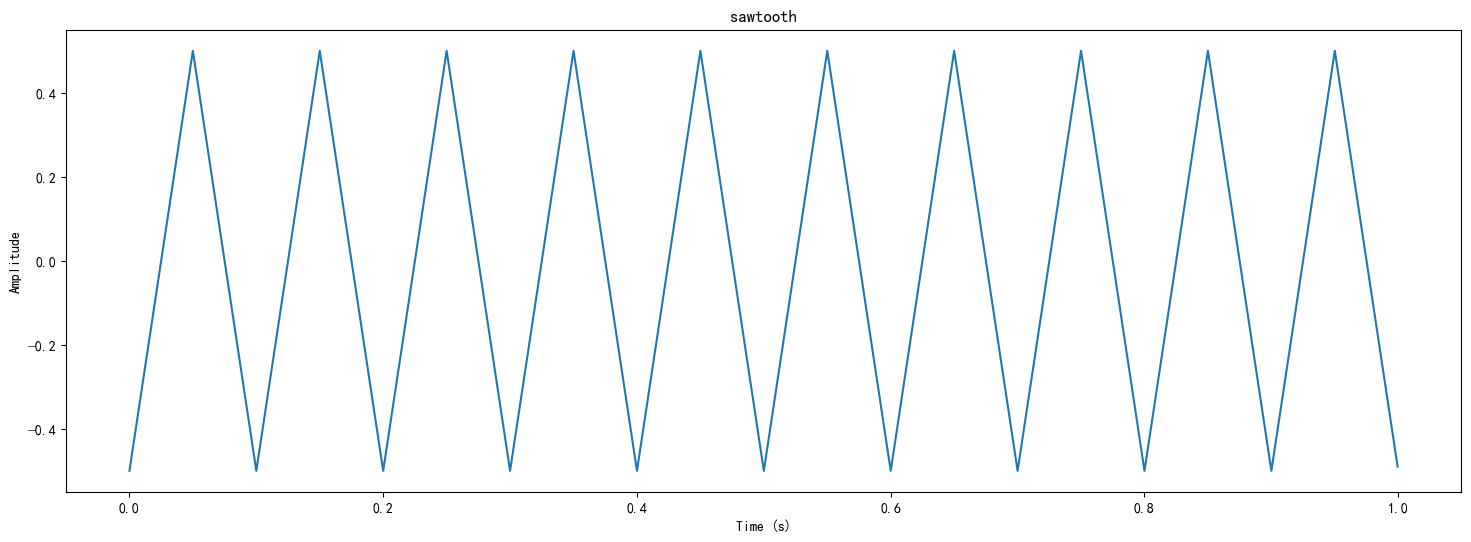

In [29]:
plt.figure(figsize=(18, 6))
plt.plot(t, tri_signal)
plt.title('sawtooth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()

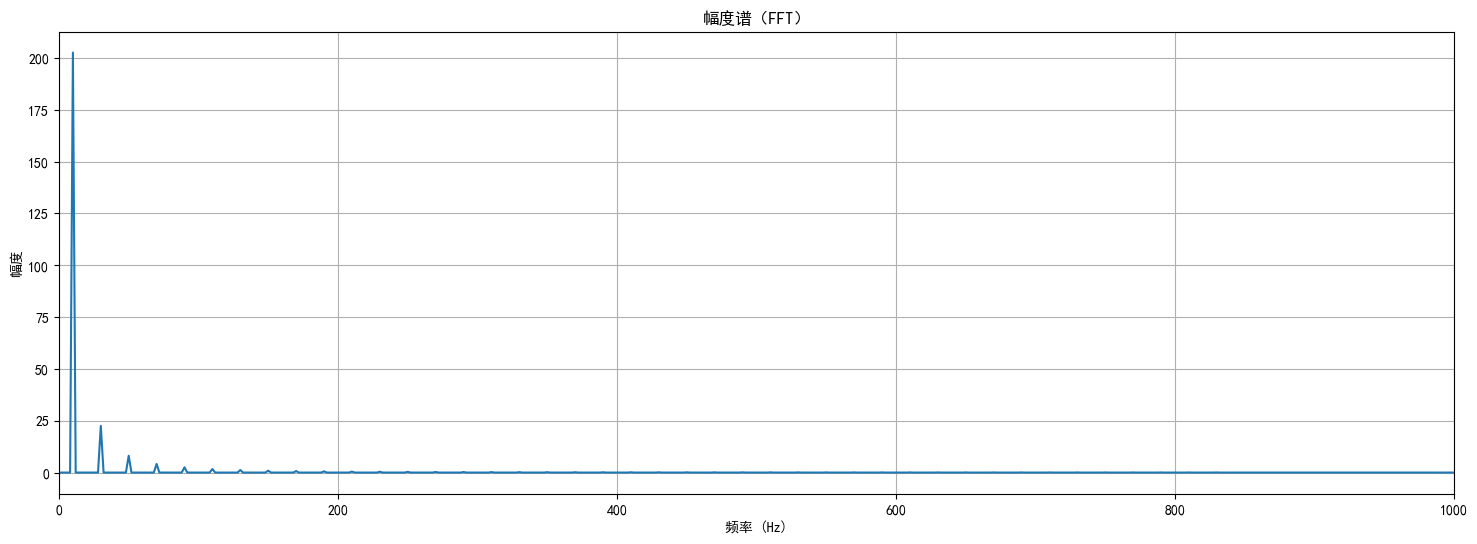

In [30]:
# 三角波/锯齿波的频谱
n_fft = 1000 # FFT窗口大小
tri_spec = np.fft.rfft(tri_signal, n=n_fft)
amplitude = np.abs(tri_spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sample_rate)  # 频率轴

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sample_rate/2)  # 限制在Nyquist频率以内
plt.show()

采样得到的信号与频谱都受采样率的影响，虽然奈奎斯特定理规定采样率高于两倍基频即可，然而如果采样率过低会导致高次谐波分量被混叠，频谱失真；所以在频谱上要想保留n次谐波分量，则需要fs>2*n*f0；也即采样率越大，保留的频谱越多；
锯齿波与三角波，由于三角波不像锯齿波在始末有近乎垂直的突变，所以高频成分较少，能量集中在低频且高次谐波能量衰减非常快。